Quetion - 1


In [15]:
import numpy as np
import struct


train_images_path = '/content/train-images.idx3-ubyte'
train_labels_path = '/content/train-labels.idx1-ubyte'
test_images_path = '/content/t10k-images.idx3-ubyte'
test_labels_path = '/content/t10k-labels.idx1-ubyte'

# defined a  function to load MNIST images directly from file.
def image_loading(filepath):
    with open(filepath, 'rb') as f:
        _, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        data = np.fromfile(f, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, rows * cols)
    return data

# defined a  function to load MNIST labels directly from file.
def label_loading(filepath):
    with open(filepath, 'rb') as f:
        _, num_labels = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Loaded the data using the file paths.
train_images = image_loading(train_images_path)
test_images =  image_loading(test_images_path)
train_labels = label_loading(train_labels_path)
test_labels = label_loading(test_labels_path)

# Calculated mean and std from training images.
mean, std = np.mean(train_images), np.std(train_images)

# Normalized both training and test images.
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std


Question -2

In [16]:
# converted labels to binary (0 for 0-4, 1 for 5-9).
train_labels = np.where(train_labels > 4, 1, 0)
test_labels = np.where(test_labels > 4, 1, 0)

# added bias term to each image.
train_images = np.hstack((train_images, np.ones((train_images.shape[0], 1))))
test_images = np.hstack((test_images, np.ones((test_images.shape[0], 1))))


# performed Xavier initialization for linear classifier.
np.random.seed(0)
d = train_images.shape[1]  # 785
v = np.random.normal(0, np.sqrt(1 / d), size=(d,))

# defined linear model and quadratic loss function.
def Linear_Model(x, v):
    return np.dot(x, v)

def quadratic_loss_function(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# trained parameters.
learning_rate = 0.005
batch_size = 10
epochs = 10

# trained loop for linear classifier.
for epoch in range(epochs):
    permutation = np.random.permutation(len(train_images))
    train_images, train_labels = train_images[permutation], train_labels[permutation]
    for i in range(0, len(train_images), batch_size):
        x_batch = train_images[i:i + batch_size]
        y_batch = train_labels[i:i + batch_size]
        y_pred = Linear_Model(x_batch, v)
        loss = quadratic_loss_function(y_pred, y_batch)
        grad = np.dot(x_batch.T, (y_pred - y_batch)) / batch_size
        v -= learning_rate * grad
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

# tested accuracy for linear classifier.
y_test_prediction = Linear_Model(test_images, v)
y_test_prediction_binary = (y_test_prediction > 0.5).astype(int)
accuracy = np.mean(y_test_prediction_binary == test_labels)
print(f'Linear Classifier Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/10, Loss: 0.24166406620582476
Epoch 2/10, Loss: 0.14756689303676282
Epoch 3/10, Loss: 0.13211817753411043
Epoch 4/10, Loss: 0.12137509578247134
Epoch 5/10, Loss: 0.1607233583737534
Epoch 6/10, Loss: 0.2872387764875974
Epoch 7/10, Loss: 0.06229411831477707
Epoch 8/10, Loss: 0.08573852516842059
Epoch 9/10, Loss: 0.08332660435555936
Epoch 10/10, Loss: 0.20963099758676607
Linear Classifier Test Accuracy: 81.43%


Question -3


Training neural network with 5 hidden units...
Iteration 100: Train Accuracy = 0.7638, Test Accuracy = 0.7680
Iteration 200: Train Accuracy = 0.8010, Test Accuracy = 0.8062
Iteration 300: Train Accuracy = 0.8267, Test Accuracy = 0.8305
Iteration 400: Train Accuracy = 0.8468, Test Accuracy = 0.8553
Iteration 500: Train Accuracy = 0.8590, Test Accuracy = 0.8627
Iteration 600: Train Accuracy = 0.8423, Test Accuracy = 0.8516
Iteration 700: Train Accuracy = 0.8731, Test Accuracy = 0.8774
Iteration 800: Train Accuracy = 0.8797, Test Accuracy = 0.8843
Iteration 900: Train Accuracy = 0.8686, Test Accuracy = 0.8733
Iteration 1000: Train Accuracy = 0.8825, Test Accuracy = 0.8873
Iteration 1100: Train Accuracy = 0.8861, Test Accuracy = 0.8893
Iteration 1200: Train Accuracy = 0.8791, Test Accuracy = 0.8830
Iteration 1300: Train Accuracy = 0.8882, Test Accuracy = 0.8905
Iteration 1400: Train Accuracy = 0.8919, Test Accuracy = 0.8907
Iteration 1500: Train Accuracy = 0.8865, Test Accuracy = 0.8871
I

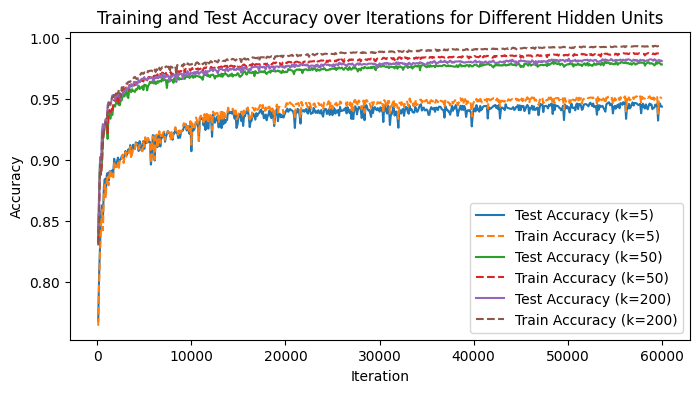


Final Test Accuracies for different hidden units:
Hidden units (k=5): Final Test Accuracy = 94.38%
Hidden units (k=50): Final Test Accuracy = 97.85%
Hidden units (k=200): Final Test Accuracy = 98.13%


In [19]:
import matplotlib.pyplot as plt

# defined Xavier initialization.
def initialization_of_weights(d, k):
    W = np.random.normal(0, np.sqrt(1 / d), (k, d))
    v = np.random.normal(0, np.sqrt(1 / k), k)
    return W, v

# defined ReLU activation function.
def ReLu(x):
    return np.maximum(0, x)

# defined Neural network forward pass.
def Neural_Networks(x, W, v):
    hidden = ReLu(np.dot(x, W.T))
    return np.dot(hidden, v)

# defined a Quadratic loss function.
def Quadratic_Loss_Function(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# trained function for neural network.
def training_neural_network(train_images, train_labels, test_images, test_labels, k, learning_rate=0.01, batch_size=10, epochs=10):
    d = train_images.shape[1]
    W, v = initialization_of_weights(d, k)
    train_accuracies = []
    test_accuracies = []
    iteration_counts = []

    # defined a Training loop.
    iteration = 0
    for epoch in range(epochs):
        # Shuffle training data.
        perm = np.random.permutation(len(train_images))
        train_images, train_labels = train_images[perm], train_labels[perm]

        for i in range(0, len(train_images), batch_size):
            # mini-batch..
            x_batch = train_images[i:i + batch_size]
            y_batch = train_labels[i:i + batch_size]

            # forward pass.
            hidden = ReLu(np.dot(x_batch, W.T))
            y_pred = np.dot(hidden, v)

            # computed gradients.
            grad_y_prediction = 2 * (y_pred - y_batch)[:, np.newaxis] / batch_size  # Reshape to (batch_size, 1)
            grad_v = np.dot(hidden.T, grad_y_prediction).flatten()
            grad_hidden = np.dot(grad_y_prediction, v[np.newaxis, :]) * (hidden > 0)
            grad_W = np.dot(grad_hidden.T, x_batch)

            # updated parameters.
            v -= learning_rate * grad_v
            W -= learning_rate * grad_W

            # tracked iteration and accuracy.
            iteration += 1
            if iteration % 100 == 0:
                train_accuracy = np.mean((Neural_Networks(train_images, W, v) > 0.5) == train_labels)
                test_accuracy = np.mean((Neural_Networks(test_images, W, v) > 0.5) == test_labels)
                train_accuracies.append(train_accuracy)
                test_accuracies.append(test_accuracy)
                iteration_counts.append(iteration)
                print(f"Iteration {iteration}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    # printed final test accuracy.
    final_test_accuracy = np.mean((Neural_Networks(test_images, W, v) > 0.5) == test_labels)
    print(f"Final Test Accuracy with {k} hidden units: {final_test_accuracy * 100:.2f}%")

    return iteration_counts, train_accuracies, test_accuracies, final_test_accuracy

# trained and evaluated for different hidden layer sizes.
hidden_units = [5, 50, 200]
learning_rate = 0.01
results = {}

for k in hidden_units:
    print(f"\nTraining neural network with {k} hidden units...")
    iteration_count, train_accuracies, test_accuracies, final_test_accuracy = training_neural_network(
        train_images, train_labels, test_images, test_labels, k, learning_rate=learning_rate, batch_size=10, epochs=10
    )
    results[k] = (iteration_count, train_accuracies, test_accuracies, final_test_accuracy)

# plotted the accuracy progress.
plt.figure(figsize=(8, 4))
for k in hidden_units:
    iteration_counts, train_accuracies, test_accuracies, _ = results[k]
    plt.plot(iteration_counts, test_accuracies, label=f"Test Accuracy (k={k})")
    plt.plot(iteration_counts, train_accuracies, linestyle='--', label=f"Train Accuracy (k={k})")

plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy over Iterations for Different Hidden Units")
plt.legend()
plt.show()

# printed final test accuracies for each k value.
print("\nFinal Test Accuracies for different hidden units:")
for k, (_, _, _, final_test_accuracy) in results.items():
    print(f"Hidden units (k={k}): Final Test Accuracy = {final_test_accuracy * 100:.2f}%")


Question - 4


Training neural network with 5 hidden units using logistic loss...
Iteration 100: Train Accuracy = 0.7788, Test Accuracy = 0.7834
Iteration 200: Train Accuracy = 0.8184, Test Accuracy = 0.8318
Iteration 300: Train Accuracy = 0.8487, Test Accuracy = 0.8569
Iteration 400: Train Accuracy = 0.8640, Test Accuracy = 0.8746
Iteration 500: Train Accuracy = 0.8646, Test Accuracy = 0.8769
Iteration 600: Train Accuracy = 0.8669, Test Accuracy = 0.8641
Iteration 700: Train Accuracy = 0.8788, Test Accuracy = 0.8817
Iteration 800: Train Accuracy = 0.8850, Test Accuracy = 0.8894
Iteration 900: Train Accuracy = 0.8754, Test Accuracy = 0.8716
Iteration 1000: Train Accuracy = 0.8941, Test Accuracy = 0.8970
Iteration 1100: Train Accuracy = 0.8962, Test Accuracy = 0.8983
Iteration 1200: Train Accuracy = 0.8950, Test Accuracy = 0.8928
Iteration 1300: Train Accuracy = 0.8996, Test Accuracy = 0.9014
Iteration 1400: Train Accuracy = 0.9036, Test Accuracy = 0.9035
Iteration 1500: Train Accuracy = 0.9002, Test

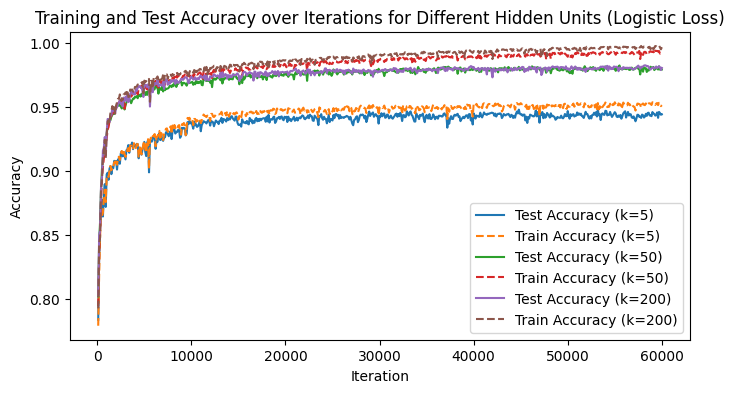


Final Test Accuracies for different hidden units:
Hidden units (k=5): Final Test Accuracy = 94.39%
Hidden units (k=50): Final Test Accuracy = 97.90%
Hidden units (k=200): Final Test Accuracy = 98.02%


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# defined Xavier initialization for weights.
def initialization_of_weights(d, k):
    W = np.random.normal(0, np.sqrt(1 / d), (k, d))
    v = np.random.normal(0, np.sqrt(1 / k), k)
    return W, v

# defined ReLU activation function for hidden layer.
def ReLu(x):
    return np.maximum(0, x)

# defined  Sigmoid function for output layer.
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

# defined Neural network forward pass with sigmoid for the output.
def Neural_Network(x, W, v):
    hidden = ReLu(np.dot(x, W.T))
    return np.dot(hidden, v)

# defined a Logistic loss function.
def logistic_loss_function(y_pred, y_true):
    y_pred = Sigmoid(y_pred)  # Applied sigmoid to convert to probability.


    # Clipped values to prevent log(0) issues.
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Trained function for neural network with logistic loss.
def training_neural_network_logistic(train_images, train_labels, test_images, test_labels, k, learning_rate=0.01, batch_size=10, epochs=10):
    d = train_images.shape[1]
    W, v = initialization_of_weights(d, k)
    train_accuracies = []
    test_accuracies = []
    iteration_counts = []

    # defined a Training loop.
    iteration = 0
    for epoch in range(epochs):

        # Shuffled training data.
        perm = np.random.permutation(len(train_images))
        train_images, train_labels = train_images[perm], train_labels[perm]

        for i in range(0, len(train_images), batch_size):

            # mini-batch.
            x_batch = train_images[i:i + batch_size]
            y_batch = train_labels[i:i + batch_size]

            # forward pass.
            hidden = ReLu(np.dot(x_batch, W.T))
            y_pred = np.dot(hidden, v)

            # calculated the  logistic loss.
            loss = logistic_loss_function(y_pred, y_batch)

            # computed the  gradients.
            grad_y_pred = (Sigmoid(y_pred) - y_batch)[:, np.newaxis] / batch_size  # Gradient w.r.t. output
            grad_v = np.dot(hidden.T, grad_y_pred).flatten()  # Gradient for v
            grad_hidden = np.dot(grad_y_pred, v[np.newaxis, :]) * (hidden > 0)  # Gradient for hidden layer
            grad_W = np.dot(grad_hidden.T, x_batch)  # Gradient for W

            # updated the  parameters.
            v -= learning_rate * grad_v
            W -= learning_rate * grad_W

            # tracked iteration and accuracy.
            iteration += 1
            if iteration % 100 == 0:
                train_accuracy = np.mean((Sigmoid(Neural_Network(train_images, W, v)) > 0.5) == train_labels)
                test_accuracy = np.mean((Sigmoid(Neural_Network(test_images, W, v)) > 0.5) == test_labels)
                train_accuracies.append(train_accuracy)
                test_accuracies.append(test_accuracy)
                iteration_counts.append(iteration)
                print(f"Iteration {iteration}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    # printed the final test accuracy.
    final_test_accuracy = np.mean((Sigmoid(Neural_Network(test_images, W, v)) > 0.5) == test_labels)
    print(f"Final Test Accuracy with {k} hidden units: {final_test_accuracy * 100:.2f}%")

    return iteration_counts, train_accuracies, test_accuracies, final_test_accuracy

# trained and evaluated for different hidden layer sizes.
hidden_units = [5, 50, 200]
learning_rate = 0.01
results = {}

for k in hidden_units:
    print(f"\nTraining neural network with {k} hidden units using logistic loss...")
    iteration_counts, train_accuracies, test_accuracies, final_test_accuracy = training_neural_network_logistic(
        train_images, train_labels, test_images, test_labels, k, learning_rate=learning_rate, batch_size=10, epochs=10
    )
    results[k] = (iteration_counts, train_accuracies, test_accuracies, final_test_accuracy)

# plotted the accuracy progress.
plt.figure(figsize=(8, 4))
for k in hidden_units:
    iteration_counts, train_accuracies, test_accuracies, _ = results[k]
    plt.plot(iteration_counts, test_accuracies, label=f"Test Accuracy (k={k})")
    plt.plot(iteration_counts, train_accuracies, linestyle='--', label=f"Train Accuracy (k={k})")

plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy over Iterations for Different Hidden Units (Logistic Loss)")
plt.legend()
plt.show()

# printed final test accuracies for each k value.
print("\nFinal Test Accuracies for different hidden units:")
for k, (_, _, _, final_test_accuracy) in results.items():
    print(f"Hidden units (k={k}): Final Test Accuracy = {final_test_accuracy * 100:.2f}%")
